<a href="https://colab.research.google.com/github/Addair40/Maquina-expendedora-de-bebidas/blob/main/ANALISIS_DE_MAQUINAS_EXPENDEDORAS_DE_BEBIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes:
- Jonathan Adair Ruiz Hernandez (1719110378)
- Ignacio Candia Ibarra (1718110989)

# Materia

Extraccion de Conocimiento en Base de datos

# Actividad
Proyecto final

## ANALISIS DE MAQUINAS EXPENDEDORAS DE BEBIDAD

---

Las máquinas expendedoras nos rodean en nuestra vida diaria y brindan una forma conveniente de obtener un refrigerio o una bebida. Sin embargo, las máquinas expendedoras no se llenan sin una lógica o razón específica. La razón para visualizar  los datos de las máquinas expendedoras es la explicacion en donde resulte muy similar el uso de las maquinas, esto desde la perspectiva del cliente y de las partes interesadas, con un enfoque basado en datos.

## USO DE MAQUINAS EXPENDEDORAS DE BEBIDA:

---

1- Número de máquinas expendedoras: 5

2- Número de ubicaciones: 4

3- Número de categorías de productos: 4

4- Número de productos: 162

5- Número de transacciones: 6445

6- Lugar de origen: Las vegas Nevada

# Autor

---

Bradford (Ford) Johnson



Importar bibliotecas de Python y cargar datos, lectura del cvs como nombre "maquinaexpendedora.csv"

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt


df = pd.read_csv("maquinaexpendedora.csv")

Limpieza total de datos 

In [20]:
df = df.dropna()

Resumen de datos

In [21]:
total_overview = df.groupby("Category").sum()[['RPrice']]
total_overview['Total Revenue'] = total_overview['RPrice']
total_overview = total_overview.drop(['RPrice'], axis=1)
total_overview = total_overview.sort_values(by = 'Total Revenue', ascending=False)
print(total_overview)

                Total Revenue
Category                     
Food                  5835.25
Carbonated            3371.50
Non Carbonated        1811.25
Water                  893.25


El ingreso promedio por bebida para las bebidas carbonatadas es igual al ingreso promedio por bebida para las bebidas no carbonatadas.
Suponiendo que hay igual demanda (compras) entre las dos categorías

1.1- Se crea marcos de datos para categorías carbonatadas y no carbonatadas


1.2- Se realiza una prueba para probar variables

1.3- Contexto en grafica

La gráfica de barras muestra el ingreso promedio por producto para bebidas carbonatadas y no carbonatadas
- Sin embargo, las bebidas no carbonatadas cuestan más en promedio que sus contrapartes carbonatadas.
- Esta es una diferencia significativa con un nivel de confianza del 95 %.

Debido a que las bebidas no carbonatadas son más caras pero tienen menos ingresos totales que las bebidas carbonatadas, eso significaría que las bebidas carbonatadas se compran con más frecuencia.

14.522678813161257 7.95456326451125e-46
AxesSubplot(0.125,0.125;0.775x0.755)


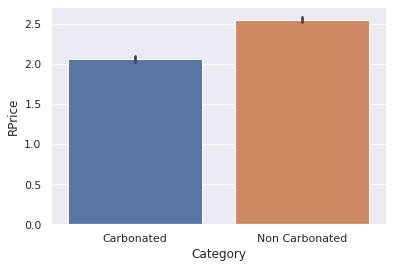

In [9]:
# 1.1
df_carb = df.loc[df['Category'] == 'Carbonated']
df_noncarb = df.loc[df['Category'] == 'Non Carbonated']

# 1.2
tc, pc = ttest_ind(df_noncarb['RPrice'], df_carb['RPrice'])
print(tc, pc)

# 1.3  
from numpy import mean
t_1 = df[df['Category'].isin(['Carbonated', 'Non Carbonated'])]
h_1 = sns.barplot(x = 'Category', y = 'RPrice', data = t_1, estimator = mean)
print(h_1)

Obtener recuentos de bebidas carbonatadas y no carbonatadas

In [10]:
count_overview = t_1.groupby("Category").count()[['RPrice']]
count_overview['Total Sold'] = count_overview['RPrice']
count_overview = count_overview.drop(['RPrice'], axis=1)
print(count_overview)

                Total Sold
Category                  
Carbonated            1639
Non Carbonated         710


# Carbonatadas Vs no Carbonatadas

En promedio, las bebidas no carbonatadas generan más ingresos que las bebidas carbonatadas, pero las bebidas carbonatadas se venden más. Con muchas opciones diferentes y espacio limitado para bebidas en las máquinas expendedoras,  se necesita optimizar la selección de productos.


*   Se debe tener cuales son las bebidas carbonatadas mas populares.



#Bebidas carbonatadas mas populares


1.1- Crear df filtrado solo para bebidas carbonatadas

1.2- Obtener conteos para cada producto

1.3 Todas las opciones totales (16 en total)

In [11]:
# 1.1
carbonated_df = df.loc[df['Category'] == 'Carbonated']

# 1.2
carb_count_overview = carbonated_df.groupby('Product').count()[['RPrice']]
carb_count_overview['Total Sold'] = carb_count_overview['RPrice']
carb_count_overview = carb_count_overview.drop(['RPrice'], axis=1)
carb_count_overview = carb_count_overview.sort_values(by = 'Total Sold', ascending=False)

# 1.3
print(carb_count_overview)
carb_top_5 = carb_count_overview.head()
carb_bottom_11 = carb_count_overview.tail(11)

                                               Total Sold
Product                                                  
Coca Cola - Zero Sugar                                517
Monster Energy Original                               385
Sunkist Soda - Orange                                 217
Red Bull - Original                                   157
Coca Cola - Regular                                   155
Starbucks Refresher - Real Coconut Water               53
Spindrift - Sparkling Water - Pineapple                51
Keto Krisp - Almond Butter                             27
Spindrift - Sparkling Water  Lime                      22
Red Bull - Energy Drink - Sugar Free                   21
Keto Krisp - Almond/Chocolate                          15
Bubly - Cherry                                          5
Bubly - Mango                                           5
Monster Energy  Zero Ultra                              4
S. Pellegrino Essenza Mineral Water - Blood O           3
Remedy Kombuch

# Top 5 de bebidas carbonatadas en general
Estas son las 5 mejores bebidas carbonatadas y también todas tienen más de 100 compras, y son las principales bebidas carbonatadas que debe almacenar en maquinas de expendedoras

In [12]:
print(carb_top_5)

                         Total Sold
Product                            
Coca Cola - Zero Sugar          517
Monster Energy Original         385
Sunkist Soda - Orange           217
Red Bull - Original             157
Coca Cola - Regular             155


# Las 11 últimas bebidas carbonatadas en general
Estas son las bebidas que se deben reconsiderar, especialmente las que tienen menos de 30 vendidas, ya que están ocupando espacio en las máquinas y no se compran con frecuencia.

In [13]:
print(carb_bottom_11)

                                               Total Sold
Product                                                  
Starbucks Refresher - Real Coconut Water               53
Spindrift - Sparkling Water - Pineapple                51
Keto Krisp - Almond Butter                             27
Spindrift - Sparkling Water  Lime                      22
Red Bull - Energy Drink - Sugar Free                   21
Keto Krisp - Almond/Chocolate                          15
Bubly - Cherry                                          5
Bubly - Mango                                           5
Monster Energy  Zero Ultra                              4
S. Pellegrino Essenza Mineral Water - Blood O           3
Remedy Kombucha - Ginger Lemon                          2


# Bebidas sin gas (24 Productos Totales)

1.1- Crear df filtrado solo para bebidas no carbonatadas

1.2-Obtener recuentos para cada producto

1.3-Todas las opciones totales

In [14]:
# 1.1
non_carbonated_df = df.loc[df['Category'] == 'Non Carbonated']

# 1.2
non_carb_count_overview = non_carbonated_df.groupby('Product').count()[['RPrice']]
non_carb_count_overview['Total Sold'] = non_carb_count_overview['RPrice']
non_carb_count_overview = non_carb_count_overview.drop(['RPrice'], axis=1)
non_carb_count_overview = non_carb_count_overview.sort_values(by = 'Total Sold', ascending=False)

# 1.3 
print(non_carb_count_overview)

                                            Total Sold
Product                                               
Snapple Diet Tea - Peach Tea                       109
Snapple Diet Tea - Lemon                            88
Snapple Tea - Raspberry                             79
Starbucks Doubleshot Energy - Mocha                 74
Iberia Coconut Water                                72
Snapple Tea - Lemon                                 51
Bai Antioxidant - Tanzania Lemon Super Tea          33
Snapple Tea - Peach                                 31
Snapple Diet Tea - Raspberry                        28
V8 Vegetable Juice - Original                       27
BodyArmor  LYTE - Blueberry Pomegranate             23
Bai Antioxidant - Molokai Coconut                   12
Bai Antioxidant - Zambia Bingcherry                 11
Bai Lemonade - Burundi Blueberry                    10
Honest Tea - Berry Hibiscus                         10
Bai Antioxidant - Kupang strawberry kiwi            10
Snapple Le

# Top 5 de bebidas no carbonatadas en general
Estas son las 5 bebidas no carbonatadas principales y también tienen más de 70 compras, y son las principales bebidas no carbonatadas que debe almacenar en estos lugares

In [15]:
print(non_carb_count_overview.head())

                                     Total Sold
Product                                        
Snapple Diet Tea - Peach Tea                109
Snapple Diet Tea - Lemon                     88
Snapple Tea - Raspberry                      79
Starbucks Doubleshot Energy - Mocha          74
Iberia Coconut Water                         72


# Las 19 últimas bebidas no carbonatadas en general
Estas bebidas no carbonatadas no son tan populares en estos lugares y deben reconsiderarse, si hay espacio para más bebidas no carbonatadas, entonces se debe dar la mayor consideración a las más populares de esta tabla.

In [18]:
print(non_carb_count_overview.tail(19))

                                            Total Sold
Product                                               
Snapple Tea - Lemon                                 51
Bai Antioxidant - Tanzania Lemon Super Tea          33
Snapple Tea - Peach                                 31
Snapple Diet Tea - Raspberry                        28
V8 Vegetable Juice - Original                       27
BodyArmor  LYTE - Blueberry Pomegranate             23
Bai Antioxidant - Molokai Coconut                   12
Bai Antioxidant - Zambia Bingcherry                 11
Bai Lemonade - Burundi Blueberry                    10
Honest Tea - Berry Hibiscus                         10
Bai Antioxidant - Kupang strawberry kiwi            10
Snapple Lemonade - black berry                       8
Snapple Lemonade - pineapple                         8
Snapple Lemonade - watermelon                        8
Zevia Zero Calorie Energy - Mango Ginger             6
Bai Antioxidant - Kula Watermelon                    5
Bai Antiox